In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040321.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.301961  0.298039  0.294118  0.290196  0.282353  0.278431  0.278431   

         7         8         9  ...      4192      4193      4194      4195  \
0  0.27451  0.270588  0.266667  ...  0.333333  0.341176  0.352941  0.372549   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.396078  0.419608  0.454902  0.494118    113.777778          56.75  

[1 rows x 4202 columns]
[113.77777778]  /  [56.75]
          0         1         2         3         4         5         6  \
0  0.301961  0.298039  0.294118  0.290196  0.282353  0.278431  0.278431   

         7         8         9  ...      4190      4191      4192      4193  \
0  0.27451  0.270588  0.266667  ...  0.329412  0.329412  0.333333  0.341176   

       4194      4195      4196      4197      4198      4199  
0  0.352941  0.372549  0.396078  0.419608  0.454902  0.494118  

[1 rows x 4200 columns]


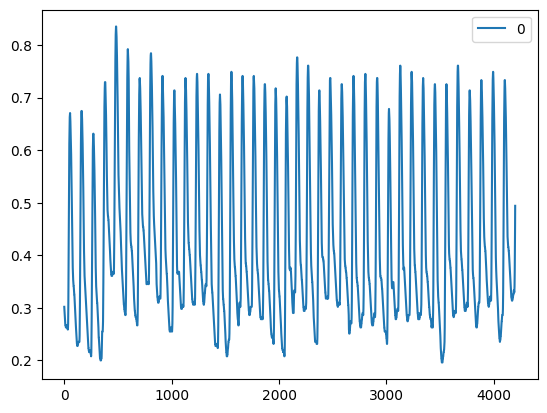

In [303]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [304]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

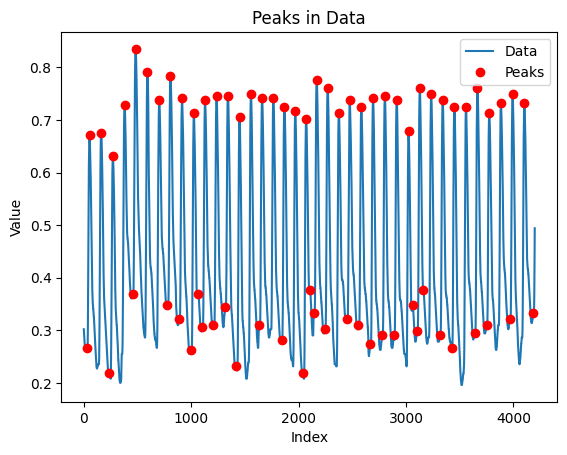

{'indices': array([  25,   53,  161,  238,  270,  380,  455,  482,  592,  703,  777,
        807,  887,  915,  996, 1025, 1063, 1104, 1129, 1207, 1236, 1318,
       1342, 1420, 1450, 1556, 1633, 1660, 1764, 1841, 1868, 1969, 2040,
       2070, 2106, 2143, 2169, 2245, 2271, 2375, 2451, 2476, 2557, 2584,
       2667, 2693, 2779, 2803, 2889, 2913, 3024, 3062, 3104, 3129, 3163,
       3234, 3316, 3342, 3425, 3451, 3559, 3639, 3666, 3750, 3775, 3884,
       3966, 3993, 4102, 4186]), 'values': array([0.26666667, 0.67058824, 0.6745098 , 0.21960784, 0.63137255,
       0.72941176, 0.36862745, 0.83529412, 0.79215686, 0.7372549 ,
       0.34901961, 0.78431373, 0.32156863, 0.74117647, 0.2627451 ,
       0.71372549, 0.36862745, 0.30588235, 0.7372549 , 0.30980392,
       0.74509804, 0.34509804, 0.74509804, 0.23137255, 0.70588235,
       0.74901961, 0.30980392, 0.74117647, 0.74117647, 0.28235294,
       0.7254902 , 0.71764706, 0.21960784, 0.70196078, 0.37647059,
       0.33333333, 0.77647059, 0.30196

In [305]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [308]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 0.6705882352941176, 0.6745098039215687, None, 0.6313725490196078, 0.7294117647058823, None, 0.8352941176470589, 0.792156862745098, 0.7372549019607844, None, 0.7843137254901961, None, 0.7411764705882353, None, 0.7137254901960784, None, None, 0.7372549019607844, None, 0.7450980392156863, None, 0.7450980392156863, None, 0.7058823529411765, 0.7490196078431373, None, 0.7411764705882353, 0.7411764705882353, None, 0.7254901960784313, 0.7176470588235294, None, 0.7019607843137254, None, None, 0.7764705882352941, None, 0.7607843137254902, 0.7137254901960784, None, 0.7372549019607844, None, 0.7254901960784313, None, 0.7411764705882353, None, 0.7450980392156863, None, 0.7372549019607844, 0.6784313725490196, None, None, 0.7607843137254902, None, 0.7490196078431373, None, 0.7372549019607844, None, 0.7254901960784313, 0.7254901960784313, None, 0.7607843137254902, None, 0.7137254901960784, 0.7333333333333333, None, 0.7490196078431373, 0.7333333333333333, None]
[0.2666666666666666, None, None, 0

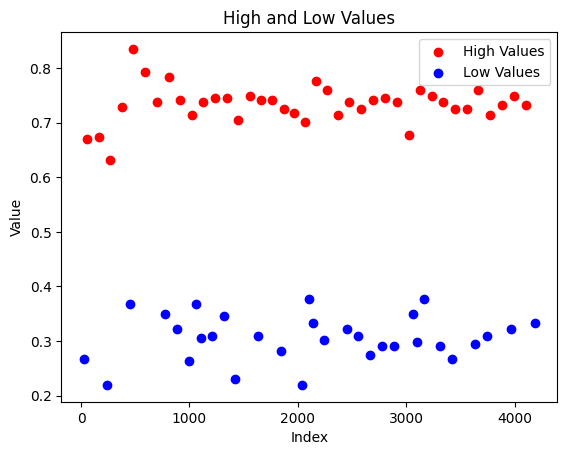

In [309]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [310]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7339366515837106
Average Low Value: 0.3063883617963315
